In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('researchfinal.csv')
data.head()

,INDEX,Date,MAX,MIN,AW,RF,SSH
0,42971,01-01-1975,28.0,15.4,7,0.0,7.6
1,42971,02-01-1975,28.0,15.8,5,0.0,6.8
2,42971,03-01-1975,28.5,15.0,9,0.0,5.7
3,42971,04-01-1975,27.6,18.5,12,0.0,7.1
4,42971,05-01-1975,26.4,15.6,13,0.0,10.2


In [4]:
data.drop(["AW" , 'RF' , 'SSH','INDEX'] , axis=1, inplace=True)

In [5]:
data.dropna(inplace=True)

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data on a monthly basis and calculate the mean temperature
monthly_data = data.resample('M').mean()

# Output the monthly data
print(monthly_data)



                  MAX        MIN
Date                            
1975-01-31  27.845161  14.738710
1975-02-28  30.628571  19.078571
1975-03-31  35.016129  22.651613
1975-04-30  36.460000  25.426667
1975-05-31  38.235484  26.777419
...               ...        ...
2024-02-29  32.500000  20.331034
2024-03-31  34.860000  23.583333
2024-04-30  39.680000  25.773333
2024-05-31  38.203333  27.036667
2024-06-30  37.093333  27.263333

[594 rows x 2 columns]


C:\Users\dsmat\AppData\Local\Temp\ipykernel_17240\779395179.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [7]:
monthly_data.fillna(method='ffill', inplace=True)
monthly_data.fillna(method='bfill', inplace=True)

C:\Users\dsmat\AppData\Local\Temp\ipykernel_17240\4162614591.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data.fillna(method='ffill', inplace=True)
C:\Users\dsmat\AppData\Local\Temp\ipykernel_17240\4162614591.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data.fillna(method='bfill', inplace=True)


In [8]:
data_re = monthly_data.reset_index()

In [9]:
monthly_data=monthly_data.drop(['MIN'],axis=1)


In [10]:
import seaborn as sns

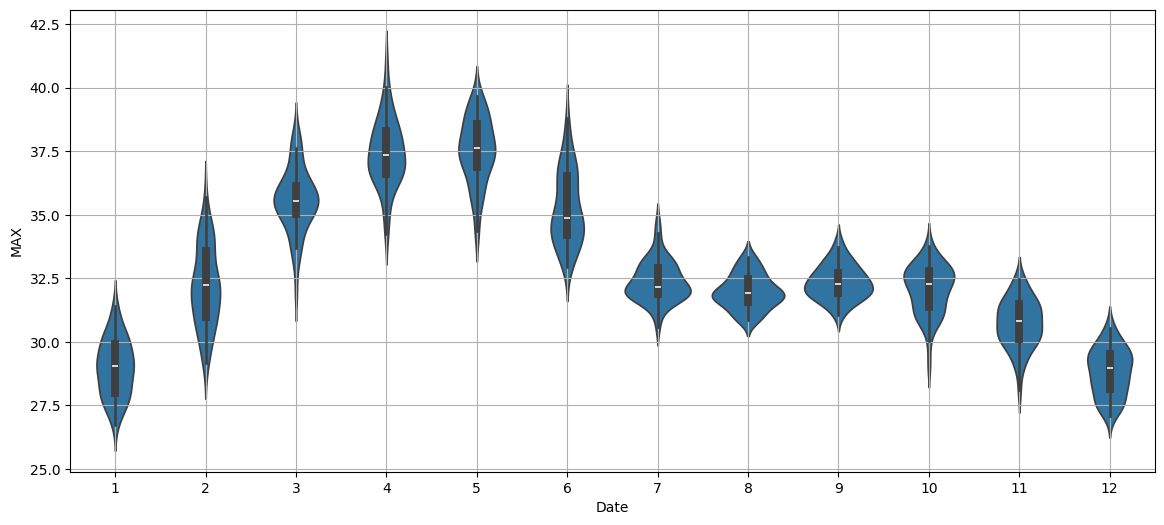

In [13]:
plt.figure(figsize=(14, 6))
sns.violinplot(x=monthly_data.index.month, y=monthly_data.MAX)
plt.grid()


In [ ]:
f80 = monthly_data['1981-01-01':'1991-01-01']
f10 = monthly_data['2011-01-01':'2021-01-01' ]


In [32]:
f80["decade"] = "1980s"
f10["decade"] = "2010s"

C:\Users\dsmat\AppData\Local\Temp\ipykernel_17240\1761951339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f80["decade"] = "1980s"
C:\Users\dsmat\AppData\Local\Temp\ipykernel_17240\1761951339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f10["decade"] = "2010s"


In [33]:
df_com = pd.concat([f80, f10])

In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


Text(0.5, 1.0, 'Monthly Maximum Temperatures (1981-1991)')

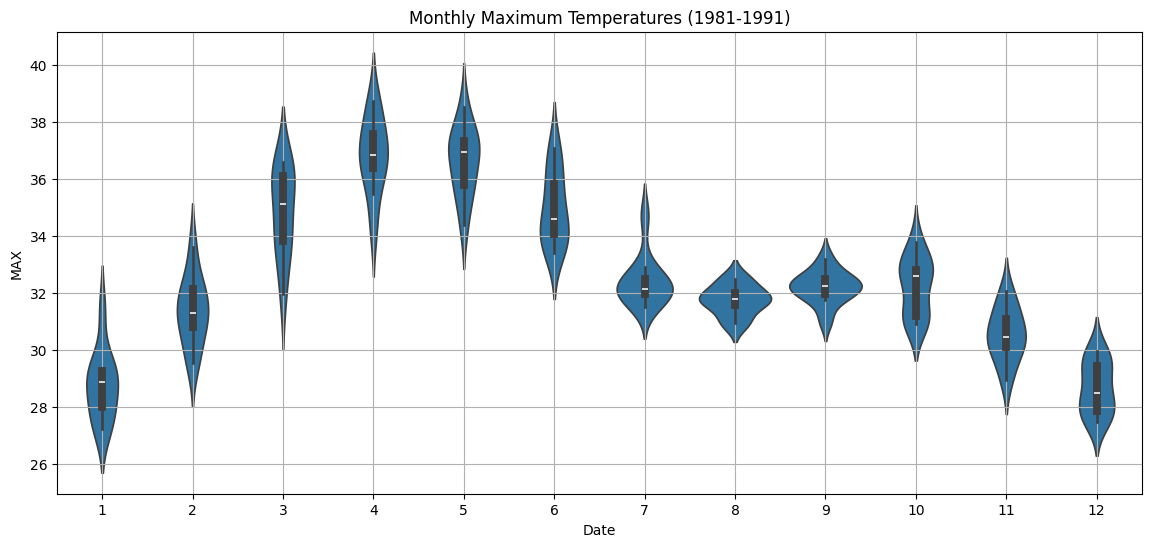

In [30]:
plt.figure(figsize=(14, 6))
sns.violinplot(x=f80.index.month, y=f80["MAX"])
plt.grid()
plt.title('Monthly Maximum Temperatures (1981-1991)')

Text(0.5, 1.0, 'Monthly Maximum Temperatures (2010-2020)')

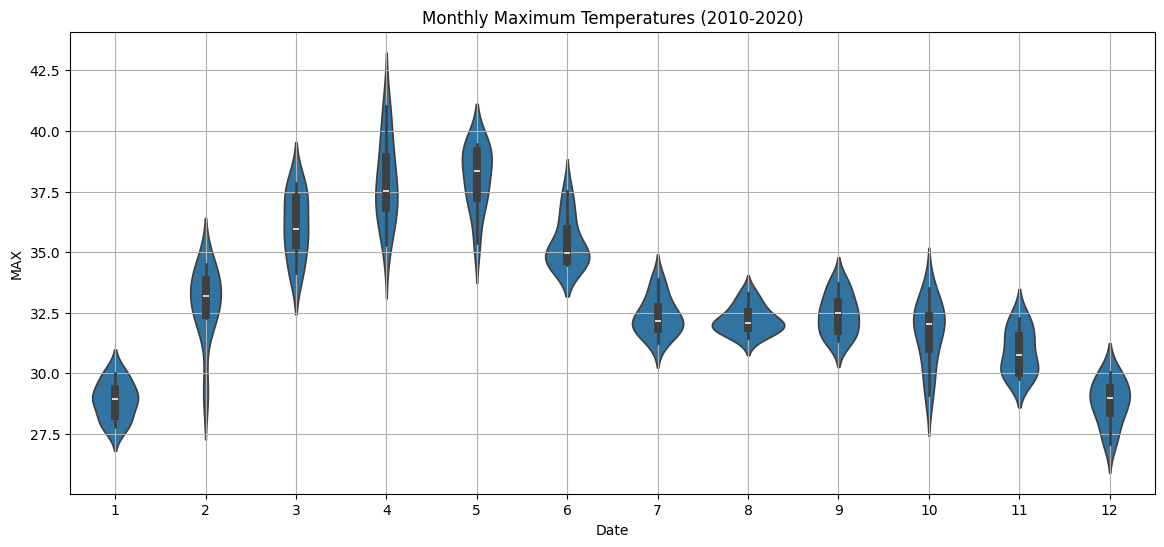

In [31]:
plt.figure(figsize=(14, 6))
sns.violinplot(x=f10.index.month, y=f10["MAX"])
plt.grid()
plt.title('Monthly Maximum Temperatures (2010-2020)')

([<matplotlib.axis.XTick at 0x18a71b5b510>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

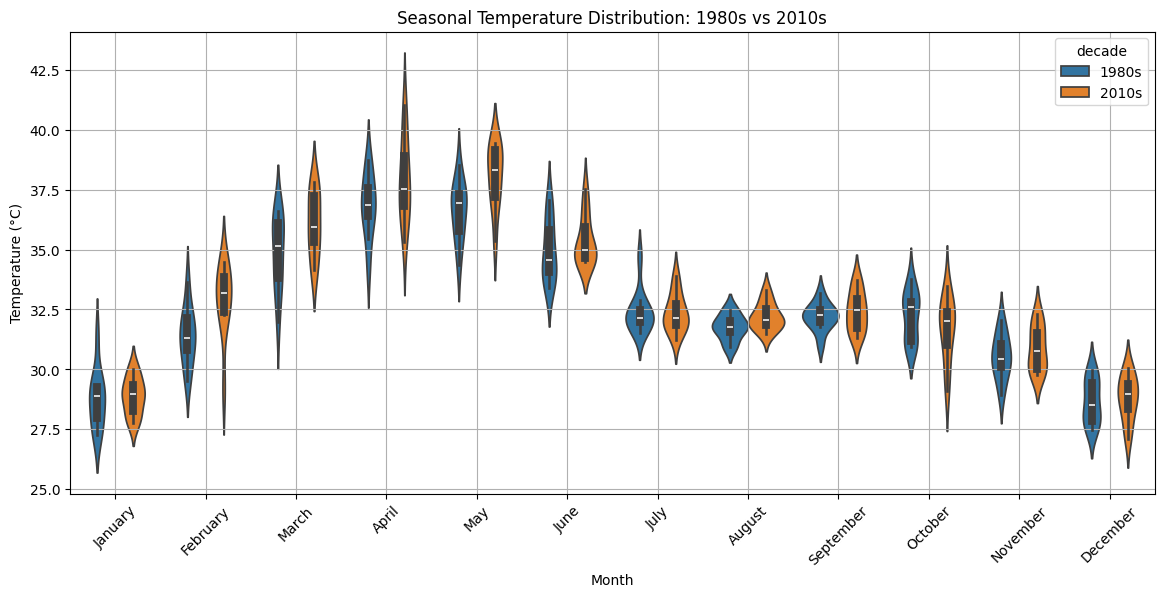

In [47]:
plt.figure(figsize=(14, 6))
sns.violinplot(data= df_com, x=df_com.index.month, y="MAX" , hue="decade")
plt.grid()
plt.title("Seasonal Temperature Distribution: 1980s vs 2010s")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(ticks=np.arange(12), labels=month_order, rotation=45)